# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [255]:


from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [303]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [304]:
# Sua análise da parte 1 começa aqui.

dataframe.head()


,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [258]:
dataframe.index

RangeIndex(start=0, stop=10000, step=1)

In [259]:
dataframe['normal'].describe()

count    10000.000000
mean        19.991456
std          4.013850
min          4.310399
25%         17.309638
50%         19.989620
75%         22.684324
max         35.704951
Name: normal, dtype: float64

In [260]:
dataframe['normal'].median()

19.98962009682849

In [261]:
dataframe['binomial'].describe()

count    10000.000000
mean        20.097000
std          4.041191
min          6.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         36.000000
Name: binomial, dtype: float64

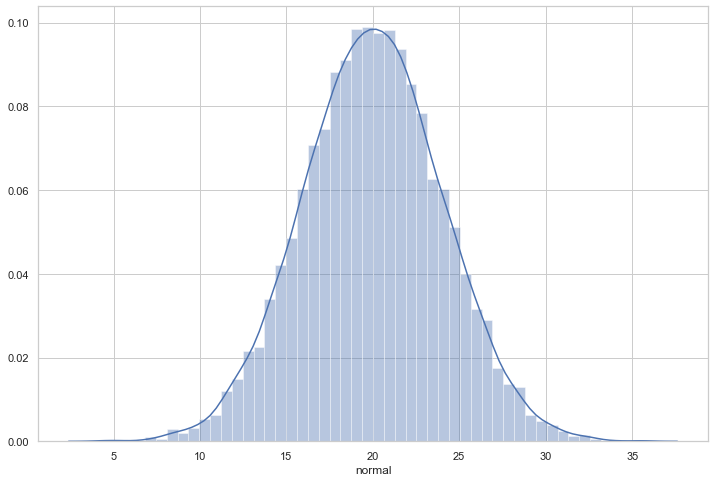

In [300]:
sns.set_style('whitegrid')
sns.distplot(dataframe['normal'])
plt.show()

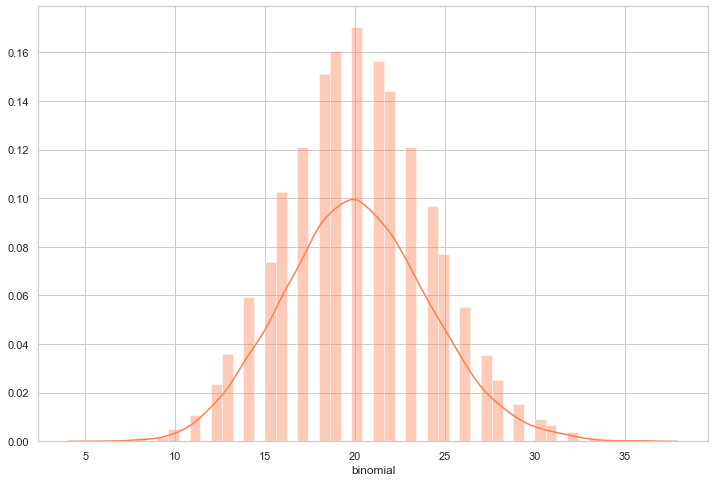

In [263]:
sns.distplot(dataframe['binomial'], color='coral')
plt.show()

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [285]:
#Questão 1
q1_norm = dataframe['normal'].quantile(.25)
q2_norm = dataframe['normal'].quantile(.5)
q3_norm = dataframe['normal'].quantile(.75)
q1_binom = dataframe['binomial'].quantile(.25)
q2_binom = dataframe['binomial'].quantile(.5)
q3_binom = dataframe['binomial'].quantile(.75)

(round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))


(0.31, -0.01, -0.316)

In [286]:
def q1():
    # Retorne aqui o resultado da questão 1.
    return (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [317]:
#Questão 2
#Um desvio padrao: 68%, Dois Desvios Padrão: 95%, 3 Desvios Padrão: 99%
media_normal = dataframe['normal'].mean()
desvio_normal = dataframe['normal'].std()
df_normal_faixa_inferior = dataframe['normal'] < (media_normal - desvio_normal)
df_normal_faixa_superior = dataframe['normal'] < (media_normal + desvio_normal)
cdf_faixa_um_desvio_padrao = (df_normal_faixa_superior.sum() - df_normal_faixa_inferior.sum()) / len(dataframe['normal'])
round(cdf_faixa_um_desvio_padrao,3)

0.684

In [318]:
def q2():
    # Retorne aqui o resultado da questão 2.
    return float(round(cdf_faixa_um_desvio_padrao,3))

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [301]:
#Questão 3
m_binom = dataframe['binomial'].mean()
print(m_binom)
v_binom = dataframe['binomial'].var()
print(v_binom)
m_norm  = dataframe['normal'].mean()
print(m_norm)
v_norm = dataframe['normal'].var()
print(v_norm)
(round(m_binom - m_norm,3), round(v_binom - v_norm,3))


20.097
16.331224122412237
19.991456066526293
16.110987985368915


(0.106, 0.22)

In [316]:
def q3():
    # Retorne aqui o resultado da questão 3.
    return (round(m_binom - m_norm,3), round(v_binom - v_norm,3))
    

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

In [270]:
binomial_2 = pd.DataFrame({"binomial": sct.binom.rvs(10000, 0.2, size=10000)})

In [271]:
binomial_2.head()

,binomial
0,1990
1,1985
2,2005
3,2017
4,2011


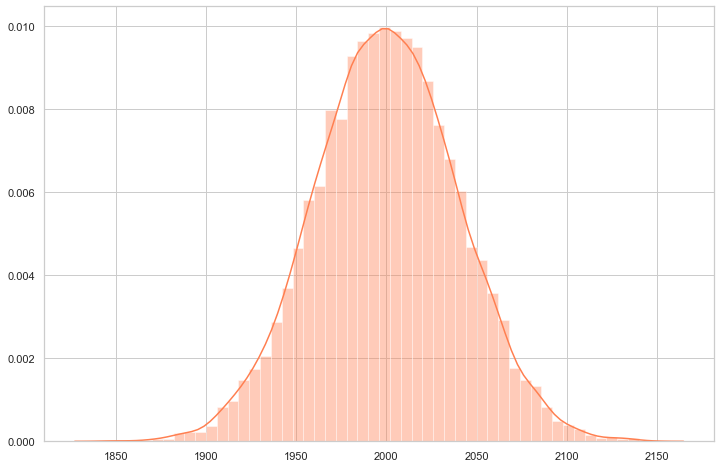

In [272]:
sns.distplot(binomial_2, color='coral')
plt.show()

## Parte 2

### _Setup_ da parte 2

In [273]:
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [274]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [275]:
false_pulsar_mean_profile = stars.query('target == 0')['mean_profile']
false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()

false_pulsar_mean_profile_standardized.head()

0   -0.804181
1   -0.775123
2    1.155263
3   -1.592787
4   -1.315613
Name: mean_profile, dtype: float64

In [276]:
#Padronização: distância por unidades de desvios padrão para a média
print(false_pulsar_mean_profile.std())
print(false_pulsar_mean_profile.var())
print(false_pulsar_mean_profile_standardized.var())
print(false_pulsar_mean_profile_standardized.mean())
print(false_pulsar_mean_profile_standardized.std())

17.475456225782562
305.39157029924246
0.9999999999999999
2.3556558898677207e-16
0.9999999999999999


In [277]:
quantil_80 = sct.norm.ppf(0.8, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('quantil_80: ', quantil_80)
quantil_90 = sct.norm.ppf(0.9, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('quantil_90: ', quantil_90)
quantil_95 = sct.norm.ppf(0.95, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('quantil_95: ', quantil_95)


quantil_80:  0.8416212335729143
quantil_90:  1.2815515655446004
quantil_95:  1.6448536269514722


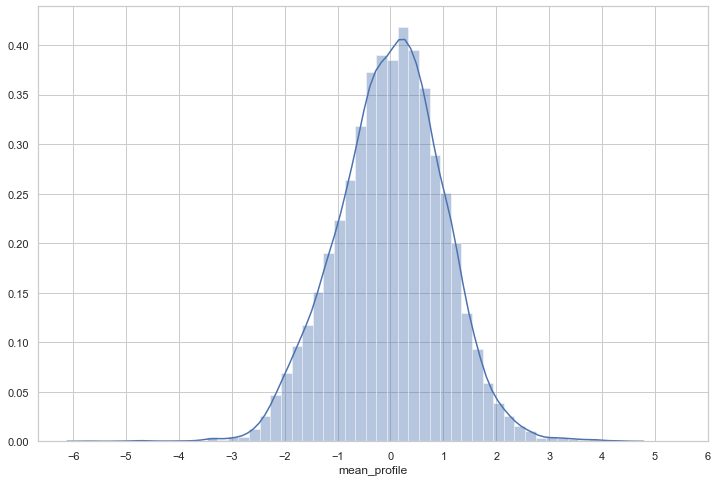

In [278]:
ax = sns.distplot(false_pulsar_mean_profile_standardized)
ax.set_xticks(np.arange(-6,7,1))
plt.show()

In [279]:
cdf_quantil_80_false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized < quantil_80)
cdf_quantil_80 = cdf_quantil_80_false_pulsar_mean_profile_standardized.sum() / len(false_pulsar_mean_profile_standardized)
print('cdf_quantil_80: ', cdf_quantil_80)

cdf_quantil_90_false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized < quantil_90)
cdf_quantil_90 = cdf_quantil_90_false_pulsar_mean_profile_standardized.sum() / len(false_pulsar_mean_profile_standardized)
print('cdf_quantil_90: ', cdf_quantil_90)

cdf_quantil_95_false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized < quantil_95)
cdf_quantil_95 = cdf_quantil_95_false_pulsar_mean_profile_standardized.sum() / len(false_pulsar_mean_profile_standardized)
print('cdf_quantil_95: ', cdf_quantil_95)

print('resposta q4: ', (round(cdf_quantil_80, 3), round(cdf_quantil_90, 3), round(cdf_quantil_95, 3)))

cdf_quantil_80:  0.8055726411612745
cdf_quantil_90:  0.9105671054250215
cdf_quantil_95:  0.9587895190060278
resposta q4:  (0.806, 0.911, 0.959)


In [280]:
def q4():
    # Retorne aqui o resultado da questão 4.
    return (round(cdf_quantil_80, 3), round(cdf_quantil_90, 3), round(cdf_quantil_95, 3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [291]:
q1_false_pulsar_mean_profile_standardized = false_pulsar_mean_profile_standardized.quantile(.25)
q2_false_pulsar_mean_profile_standardized = false_pulsar_mean_profile_standardized.quantile(.5)
q3_false_pulsar_mean_profile_standardized = false_pulsar_mean_profile_standardized.quantile(.75)

print('q1: ', q1_false_pulsar_mean_profile_standardized, 'q2: ', q2_false_pulsar_mean_profile_standardized, 'q3: ', q3_false_pulsar_mean_profile_standardized)

q1:  -0.647153176628595 q2:  0.03985946669725165 q3:  0.67065487241241


In [282]:
q1_normal_teorico = sct.norm.ppf(0.25, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('q1_normal_teorico: ', q1_normal_teorico)
q2_normal_teorico = sct.norm.ppf(0.5, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('q2_normal_teorico: ', q2_normal_teorico)
q3_normal_teorico = sct.norm.ppf(0.75, loc=0, scale=1) #loc = media, scale = desvio padrao   
print('q3_normal_teorico: ', q3_normal_teorico)



q1_normal_teorico:  -0.6744897501960817
q2_normal_teorico:  0.0
q3_normal_teorico:  0.6744897501960817


In [292]:
(round(q1_false_pulsar_mean_profile_standardized - q1_normal_teorico, 3), round(q2_false_pulsar_mean_profile_standardized - q2_normal_teorico, 3), round(q3_false_pulsar_mean_profile_standardized - q3_normal_teorico, 3))

(0.027, 0.04, -0.004)

In [293]:
def q5():
    # Retorne aqui o resultado da questão 5.
    return (round(q1_false_pulsar_mean_profile_standardized - q1_normal_teorico, 3), round(q2_false_pulsar_mean_profile_standardized - q2_normal_teorico, 3), round(q3_false_pulsar_mean_profile_standardized - q3_normal_teorico, 3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.